In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.datasets import fashion_mnist
from keras.utils import plot_model, to_categorical
from keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, precision_score, recall_score


import numpy as np
import matplotlib.pyplot as plt

In [31]:
def plot_loss(history, model):
    plt.plot(history.history['loss'], label = "Train")
    plt.plot(history.history['val_loss'], label = "Validation")
    plt.title(f"{model} train and validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(f"./Losses/{model}.png")
    plt.show()
    return

# Data processing

In [32]:
# Load data
(x_train_and_val, y_train_and_val), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data in 0-1 range
x_train_and_val = x_train_and_val / 255.0
y_train_and_val = to_categorical(y_train_and_val)

x_test = x_test / 255.0
y_test = to_categorical(y_test)

# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.

# y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

# y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

In [33]:
# building a validation set
train_size = int(x_train_and_val.shape[0] * 0.7)
validation_size = x_train_and_val.shape[0] - train_size

x_validation, y_validation = (x_train_and_val[train_size:], y_train_and_val[train_size:])
x_train, y_train = (x_train_and_val[:train_size], y_train_and_val[:train_size])

# Baseline model
input -> convolutional 16 -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 64 -> output

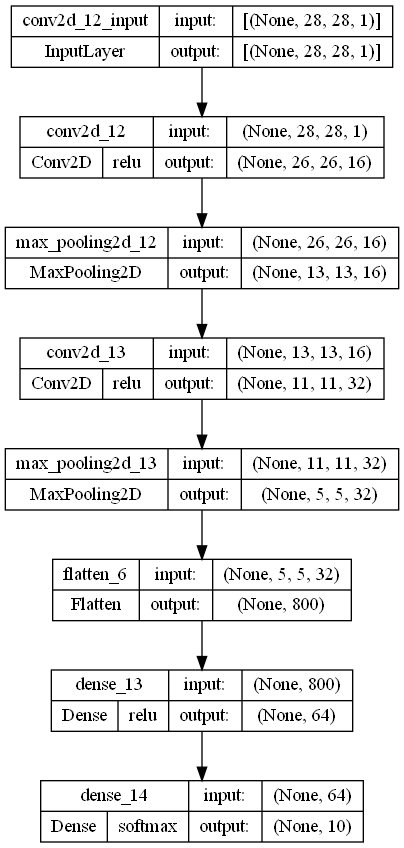

In [34]:
img_width = 28
img_height = 28
num_classes = 10
channels = 1
# Initialize the model
model = Sequential()

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model.add(Dense(64, activation='relu'))

# Add the output layer with a softmax activation function for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.001
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True, to_file="./Models/baseline_model.png")



In [35]:
history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 25s 18ms/step - loss: 0.5506 - accuracy: 0.8000 - val_loss: 0.4026 - val_accuracy: 0.8566
Epoch 2/15
1313/1313 [==============================] - 21s 16ms/step - loss: 0.3712 - accuracy: 0.8674 - val_loss: 0.3545 - val_accuracy: 0.8731
Epoch 3/15
1313/1313 [==============================] - 19s 15ms/step - loss: 0.3264 - accuracy: 0.8822 - val_loss: 0.3373 - val_accuracy: 0.8799
Epoch 4/15
1313/1313 [==============================] - 25s 19ms/step - loss: 0.2952 - accuracy: 0.8922 - val_loss: 0.3159 - val_accuracy: 0.8865
Epoch 5/15
1313/1313 [==============================] - 25s 19ms/step - loss: 0.2713 - accuracy: 0.9020 - val_loss: 0.3067 - val_accuracy: 0.8895
Epoch 6/15
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2489 - accuracy: 0.9085 - val_loss: 0.3024 - val_accuracy: 0.8901
Epoch 7/15
1313/1313 [==============================] - 22s 17ms/step - loss: 0.2347 - accuracy: 0.9137 - val_loss: 0.2841 -

In [36]:

print('\nValidation accuracy:', history.history['val_accuracy'][-1])

# in depth evaluation
predictions = model.predict(x_validation)

# going back to labels
predictions = np.argmax (predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.9042222499847412
563/563 [==============================] - 3s 4ms/step
Precision:  0.903661442257642
Recall:  0.9040770854490102


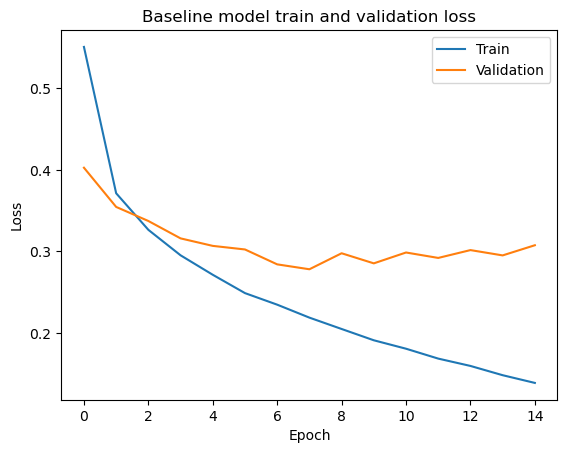

In [37]:
plot_loss(history, "Baseline model")

# Model 2: dropout layer
input -> convolutional 16 -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 64 -> Dropout -> output

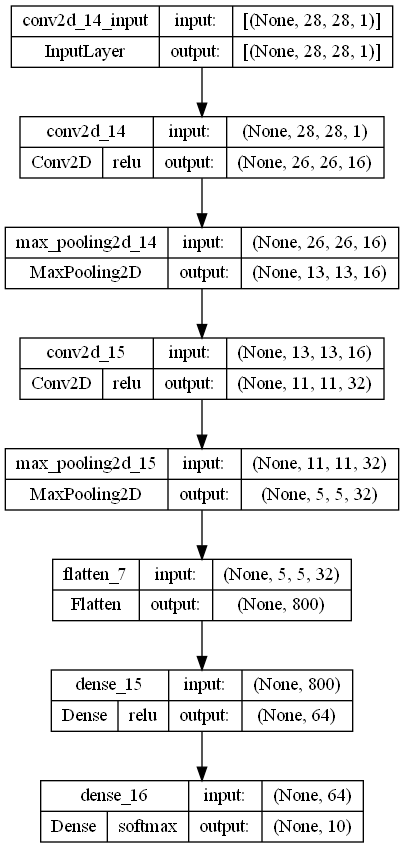

In [38]:


# Initialize the model
model2 = Sequential()

# model.add(Flatten(input_shape=(28, 28)))

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))


# Add a max pooling layer with 2x2 pool size
model2.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model2.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model2.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

# Flatten the output to a 1D array
model2.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model2.add(Dense(64, activation='relu'))

# Add a dropout layer with a 0.5 dropout rate
model.add(Dropout(0.3))

# Add the output layer with a softmax activation function for multi-class classification
model2.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.001
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model2, show_shapes=True, show_layer_activations=True, to_file="./Models/model2.png")

In [39]:
history2 = model2.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 19s 14ms/step - loss: 0.5574 - accuracy: 0.7973 - val_loss: 0.3973 - val_accuracy: 0.8579
Epoch 2/15
1313/1313 [==============================] - 18s 13ms/step - loss: 0.3713 - accuracy: 0.8654 - val_loss: 0.3699 - val_accuracy: 0.8662
Epoch 3/15
1313/1313 [==============================] - 18s 13ms/step - loss: 0.3240 - accuracy: 0.8818 - val_loss: 0.3246 - val_accuracy: 0.8836
Epoch 4/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2947 - accuracy: 0.8927 - val_loss: 0.3359 - val_accuracy: 0.8768
Epoch 5/15
1313/1313 [==============================] - 18s 13ms/step - loss: 0.2710 - accuracy: 0.8998 - val_loss: 0.2923 - val_accuracy: 0.8943
Epoch 6/15
1313/1313 [==============================] - 18s 13ms/step - loss: 0.2537 - accuracy: 0.9060 - val_loss: 0.2859 - val_accuracy: 0.8974
Epoch 7/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2346 - accuracy: 0.9126 - val_loss: 0.2842 -

In [40]:
print('\nValidation accuracy:', history2.history['val_accuracy'][-1])


predictions = model2.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.9097222089767456
563/563 [==============================] - 2s 4ms/step
Precision:  0.9092699084269918
Recall:  0.9096758578611179


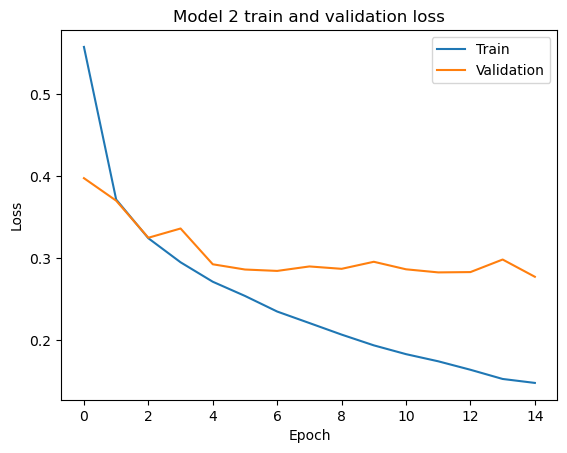

In [41]:
plot_loss(history2, "Model 2")

# Model 3: more neurons in the fully connected layer
input -> convolutional 16 -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 128 -> output

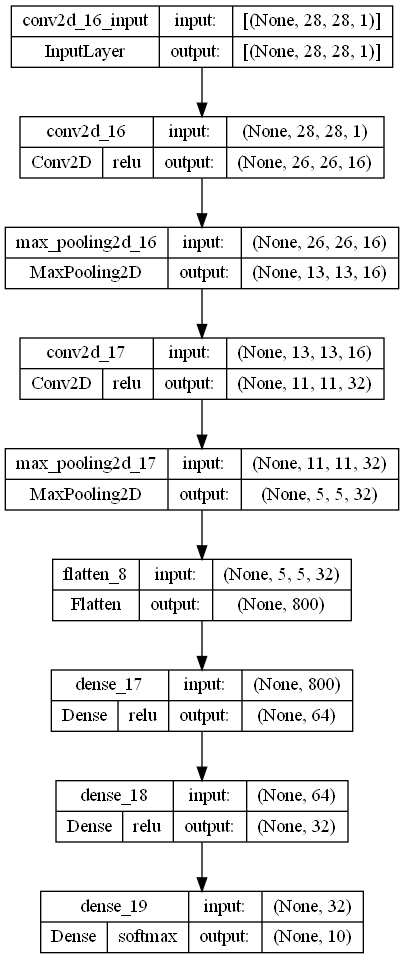

In [42]:
# Initialize the model
model3 = Sequential()

# model.add(Flatten(input_shape=(28, 28)))

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))

# Add a max pooling layer with 2x2 pool size
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model3.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model3.add(Flatten())

# Add a fully connected layer with 64 neurons and ReLU activation function
model3.add(Dense(64, activation='relu'))

# Add a fully connected layer with 32 neurons and ReLU activation function
model3.add(Dense(32, activation='relu'))

# Add the output layer with a softmax activation function for multi-class classification
model3.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.001
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model3, show_shapes=True, show_layer_activations=True, to_file="./Models/model3.png")

In [43]:
history3 = model3.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 19s 14ms/step - loss: 0.5521 - accuracy: 0.8002 - val_loss: 0.3946 - val_accuracy: 0.8578
Epoch 2/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.3704 - accuracy: 0.8645 - val_loss: 0.3637 - val_accuracy: 0.8660
Epoch 3/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.3238 - accuracy: 0.8810 - val_loss: 0.3322 - val_accuracy: 0.8811
Epoch 4/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2903 - accuracy: 0.8920 - val_loss: 0.3232 - val_accuracy: 0.8815
Epoch 5/15
1313/1313 [==============================] - 18s 13ms/step - loss: 0.2705 - accuracy: 0.8996 - val_loss: 0.3091 - val_accuracy: 0.8866
Epoch 6/15
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2474 - accuracy: 0.9071 - val_loss: 0.2856 - val_accuracy: 0.8944
Epoch 7/15
1313/1313 [==============================] - 27s 20ms/step - loss: 0.2342 - accuracy: 0.9125 - val_loss: 0.2955 -

In [44]:
print('\nValidation accuracy:', history3.history['val_accuracy'][-1])

predictions = model3.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.9042778015136719
563/563 [==============================] - 3s 5ms/step
Precision:  0.9035113882428035
Recall:  0.9042751813588717


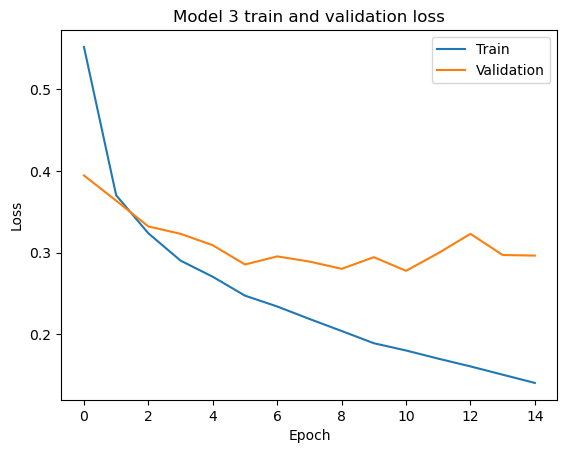

In [45]:
plot_loss(history3, "Model 3")

# Model 4: Batch Normalization
input -> convolutional 16 -> BatchNormalization -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 64 -> output

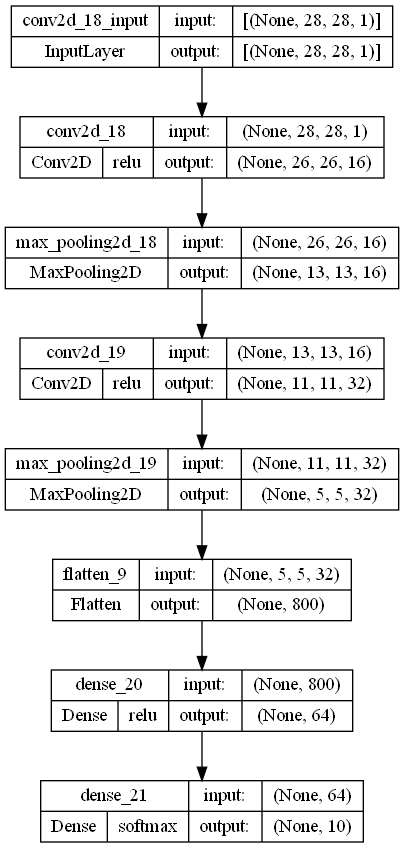

In [46]:
# Initialize the model
model4 = Sequential()

# model.add(Flatten(input_shape=(28, 28)))

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))

# Add a max pooling layer with 2x2 pool size
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Add BatchNormalization
model.add(BatchNormalization())

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model4.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Add BatchNormalization
model.add(BatchNormalization())

# Flatten the output to a 1D array
model4.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model4.add(Dense(64, activation='relu'))

# Add the output layer with a softmax activation function for multi-class classification
model4.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.001
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model4, show_shapes=True, show_layer_activations=True, to_file="./Models/model4.png")

In [47]:
history4 = model4.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 24s 17ms/step - loss: 0.5399 - accuracy: 0.8072 - val_loss: 0.3894 - val_accuracy: 0.8619
Epoch 2/15
1313/1313 [==============================] - 22s 16ms/step - loss: 0.3635 - accuracy: 0.8693 - val_loss: 0.3616 - val_accuracy: 0.8688
Epoch 3/15
1313/1313 [==============================] - 20s 15ms/step - loss: 0.3198 - accuracy: 0.8844 - val_loss: 0.3154 - val_accuracy: 0.8878
Epoch 4/15
1313/1313 [==============================] - 20s 15ms/step - loss: 0.2891 - accuracy: 0.8934 - val_loss: 0.3049 - val_accuracy: 0.8913
Epoch 5/15
1313/1313 [==============================] - 20s 15ms/step - loss: 0.2648 - accuracy: 0.9036 - val_loss: 0.2819 - val_accuracy: 0.8995
Epoch 6/15
1313/1313 [==============================] - 20s 15ms/step - loss: 0.2446 - accuracy: 0.9090 - val_loss: 0.2814 - val_accuracy: 0.9002
Epoch 7/15
1313/1313 [==============================] - 20s 16ms/step - loss: 0.2284 - accuracy: 0.9158 - val_loss: 0.2704 -

In [48]:
print('\nValidation accuracy:', history4.history['val_accuracy'][-1])

predictions = model4.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.9051666855812073
563/563 [==============================] - 3s 5ms/step
Precision:  0.9056054423319168
Recall:  0.9049871474609077


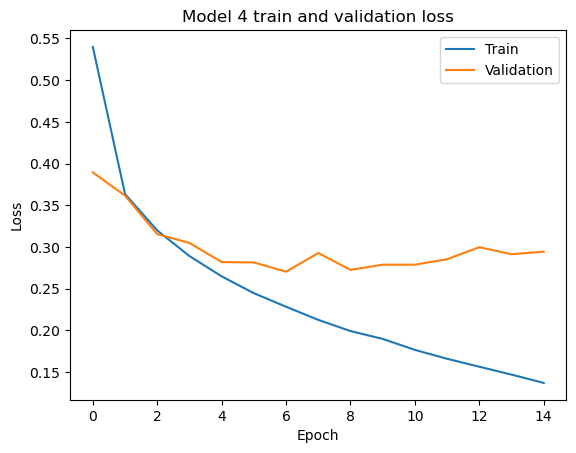

In [49]:
plot_loss(history4, "Model 4")

# Model 5: Lower Learning rate
input -> convolutional 16 -> Pooling -> Convolutional 32 -> Pooling -> Fully connected layer 64 -> output

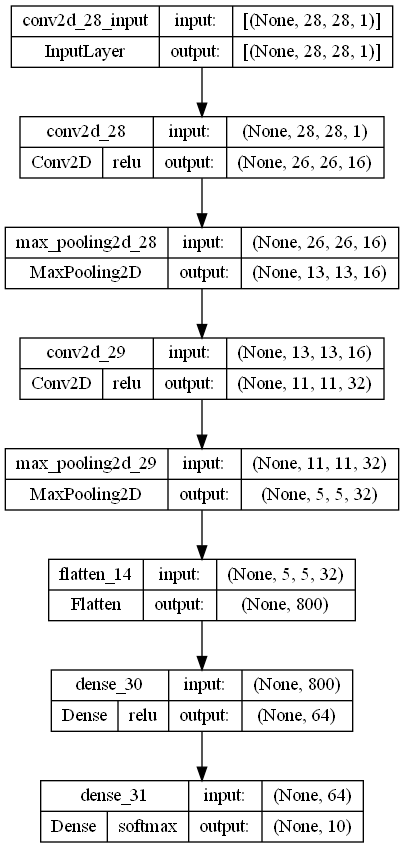

In [70]:
# Initialize the model
model5 = Sequential()

# model.add(Flatten(input_shape=(28, 28)))

# Add a convolutional layer with 32 kernels, 3x3 kernel size, and ReLU activation function
model5.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)))

# Add BatchNormalization
model.add(BatchNormalization())

# Add a max pooling layer with 2x2 pool size
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 kernels, 3x3 kernel size, and ReLU activation function
model5.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to a 1D array
model5.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation function
model5.add(Dense(64, activation='relu'))

# Add the output layer with a softmax activation function for multi-class classification
model5.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical cross-entropy loss function and Adam optimizer with a learning rate of 0.01, default is 0.001
model5.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0005), metrics=['accuracy'])

# Print a summary of the model architecture
# model.summary()
plot_model(model5, show_shapes=True, show_layer_activations=True, to_file="./Models/model5.png")

In [71]:
history5 = model5.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=15)

Epoch 1/15
1313/1313 [==============================] - 28s 20ms/step - loss: 0.6209 - accuracy: 0.7770 - val_loss: 0.4555 - val_accuracy: 0.8349
Epoch 2/15
1313/1313 [==============================] - 24s 18ms/step - loss: 0.4180 - accuracy: 0.8481 - val_loss: 0.3966 - val_accuracy: 0.8558
Epoch 3/15
1313/1313 [==============================] - 24s 19ms/step - loss: 0.3730 - accuracy: 0.8647 - val_loss: 0.3712 - val_accuracy: 0.8644
Epoch 4/15
1313/1313 [==============================] - 24s 18ms/step - loss: 0.3389 - accuracy: 0.8772 - val_loss: 0.3391 - val_accuracy: 0.8777
Epoch 5/15
1313/1313 [==============================] - 23s 18ms/step - loss: 0.3156 - accuracy: 0.8855 - val_loss: 0.3243 - val_accuracy: 0.8811
Epoch 6/15
1313/1313 [==============================] - 28s 22ms/step - loss: 0.2974 - accuracy: 0.8907 - val_loss: 0.3109 - val_accuracy: 0.8875
Epoch 7/15
1313/1313 [==============================] - 24s 18ms/step - loss: 0.2814 - accuracy: 0.8973 - val_loss: 0.3060 -

In [68]:
print('\nValidation accuracy:', history5.history['val_accuracy'][-1])

predictions = model5.predict(x_validation)

# going back to labels
predictions = np.argmax(predictions, axis = 1)
y_val = np.argmax(y_validation, axis=1)


confusion_matrix(y_val, predictions)

print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
print("Recall: ", recall_score(y_val, predictions, average = 'macro'))


Validation accuracy: 0.8842222094535828
563/563 [==============================] - 6s 11ms/step
Precision:  0.8861139456235406
Recall:  0.8840464182441252


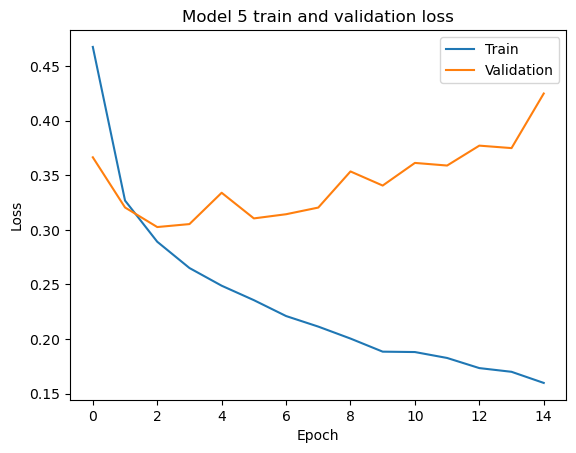

In [69]:
plot_loss(history5, "Model 5")

In [65]:
print(f"Baseline Validation accuracy: {history.history['val_accuracy'][-1]}")
print(f"Model 2 Validation accuracy: {history2.history['val_accuracy'][-1]}")
print(f"Model 3 Validation accuracy: {history3.history['val_accuracy'][-1]}")
print(f"Model 4 Validation accuracy: {history4.history['val_accuracy'][-1]}")
print(f"Model 5 Validation accuracy: {history5.history['val_accuracy'][-1]}")

Baseline Validation accuracy: 0.9042222499847412
Model 2 Validation accuracy: 0.9097222089767456
Model 3 Validation accuracy: 0.9042778015136719
Model 4 Validation accuracy: 0.9051666855812073
Model 5 Validation accuracy: 0.9013888835906982


In [55]:
# testing

# test_loss, test_acc = model.evaluate(x_validation,  y_validation, verbose=2)

# print('\nTest accuracy:', test_acc)

# # in depth evaluation
# predictions = model.predict(x_validation)

# # going back to labels
# predictions = np.argmax (predictions, axis = 1)
# y_val = np.argmax(y_validation, axis=1)


# confusion_matrix(y_val, predictions)

# print("Precision: ", precision_score(y_val, predictions, average = 'macro'))
# print("Recall: ", recall_score(y_val, predictions, average = 'macro'))